# MMagic-训练

liangyu 20230616

In [3]:
import torch
print(torch.__version__)
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

1.10.1+cu113


In [4]:
pwd

'/home/liangyu/code/mmlab2/2023AI/0616 copy'

In [5]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

In [6]:
import os
dir0 = os.getcwd()
os.listdir(dir0)
os.chdir('mmagic')
!pwd

/home/liangyu/code/mmlab2/2023AI/0616 copy/mmagic


In [8]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cpu()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 15:38:37 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/16 15:38:48 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/16 15:38:51 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


True

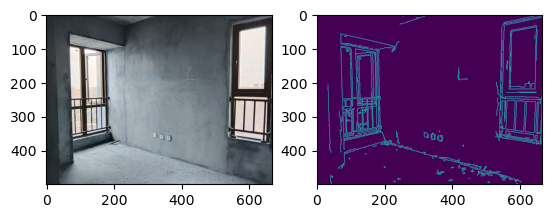

In [9]:
import cv2
import matplotlib.pyplot as plt

img0 = mmcv.imread('../room.png')
img1 =cv2.Canny(img0,60,200)

plt.subplot(121)
plt.imshow(img0)
plt.subplot(122)
plt.imshow(img1)

cv2.imwrite('../canny_room.png', img1)


#   输入Canny边缘图

In [10]:
control_img = mmcv.imread('../canny_room.png')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

In [12]:
prompt = 'Room with green walls and a gray ceiling.'

In [17]:
# predict
dirs = '../'
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(dirs + f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(dirs + f'control_{idx}.png')

100%|██████████| 20/20 [01:09<00:00,  3.47s/it]


In [15]:
!pwd

/home/liangyu/code/mmlab2/2023AI/0616 copy/mmagic


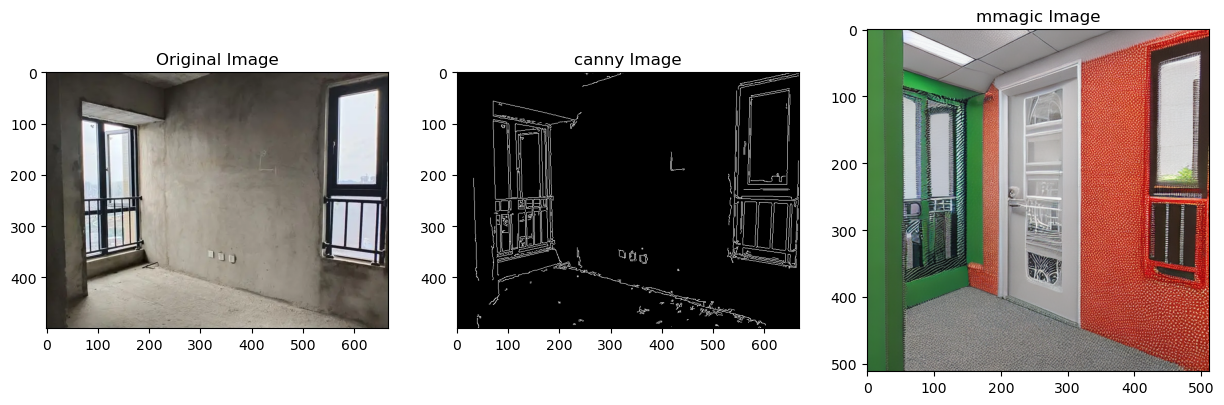

In [18]:
import matplotlib.pyplot as plt
import cv2

# 以彩色模式读取图片
original = cv2.imread('../room.png', cv2.IMREAD_COLOR)
canny = cv2.imread('../canny_room.png', cv2.IMREAD_COLOR)
edges = cv2.imread(dirs + 'sample_0.png', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
canny = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 展示原图
axs[0].imshow(original)
axs[0].set_title('Original Image')

# 展示canny 图
axs[1].imshow(canny)
axs[1].set_title('canny Image')

# 展示处理后的图像
axs[2].imshow(edges)
axs[2].set_title('mmagic Image')

# 显示图像
plt.show()